In [ ]:
from magic_gap import *

In [7]:
n_faces = 4
j_values = [1/2]*n_faces

D = wh_operators(*[j_d(j) for j in j_values])
B = intertwiner_basis(*j_values)
d, N = B.shape
flux_ops = flux_operators(j_values)
angle_ops = angle_operators(j_values, flux_ops, B=B)

V = tet_volume_operator(angle_ops)
volume_states = np.linalg.eigh(V)[1].T
print("intertwiner dim: %d | physical dim: %d" % B.shape)

intertwiner dim: 2 | physical dim: 16


Expected Gram matrix:
[[ 0.75  -0.496  0.245 -0.499]
 [-0.496  0.75  -0.499  0.245]
 [ 0.245 -0.499  0.75  -0.496]
 [-0.499  0.245 -0.496  0.75 ]]
Gram singular values: [1.99  0.508 0.502 0.   ]
Expected volume: -0.0610
Stabilizer entropy of intertwiner basis states:
[0.    0.848]
Stabilizer entropy of volume eigenstates:
[1.17 1.17]


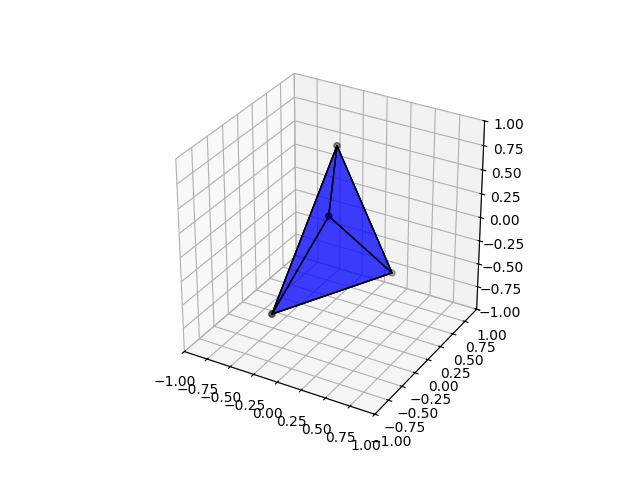

In [4]:
%matplotlib widget

ket = rand_ket(d)
rho = np.outer(ket, ket.conj())

G = expected_gram(n_faces, angle_ops, rho)

print("Expected Gram matrix:")
print(G)
print("Gram singular values: %s" % np.linalg.svd(G)[1])
print("Expected volume: %.4f" % (V @ rho).trace().real)
print("Stabilizer entropy of intertwiner basis states:\n%s" % np.array([renyi2_stabilizer_entropy(b, D) for b in B]))
print("Stabilizer entropy of volume eigenstates:\n%s" % np.array([renyi2_stabilizer_entropy(v @ B, D) for v in volume_states]))

poly = construct_poly(vecs3D_from_gram(G))
plot_poly(poly)

In [5]:
M4 = haar_moment(2, 4)
D2 = qudit_wh_operators(2)
Q2 = construct_Q(D2)
avg_intertwiner_magic = (1 - d*(Q2 @ M4).trace()).real; avg_intertwiner_magic

np.float64(0.20000000000000018)